In [ ]:
from transformers import AutoTokenizer, AutoConfig

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('tiny-llama-fast-tokenizer')


In [ ]:
# Readtext

In [ ]:
import re
text = re.sub(r' \.', '. ', text)

In [ ]:
text[:300]

'THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much. They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense. Mr Dursley was the director '

In [ ]:
import pandas as pd
# read question and answer

question_answer_train = df[['question','answer']]
question_answer_eval = df_eval[['question','answer']]

In [ ]:
from collections import defaultdict, Counter
import json

from matplotlib import pyplot as plt
import numpy as np
import torch

def print_encoding(model_inputs, indent=4):
    indent_str = " " * indent
    print("{")
    for k, v in model_inputs.items():
        print(indent_str + k + ":")
        print(indent_str + indent_str + str(v))
    print("}")

In [ ]:
i =0
data = torch.tensor([], dtype=torch.long)
while i < len(text)-2000:
  j = min(i+ 2000, len(text))
  while  j < len(text) & text[j].isalpha() == False:
    j+=1
  tokenized_id = tokenizer(text[i:j])
  tokenized_id = tokenized_id.input_ids[1:]
  data = torch.concat([data,  torch.tensor(tokenized_id, dtype=torch.long)])
  i = j
question_answer_concat = ""
for i in range(len(question_answer_train)):
  question = question_answer_train['question'][i]
  answer = question_answer_train['answer'][i]
  question_answer_concat += question
  question_answer_concat += " "
  question_answer_concat += answer
  question_answer_concat += ". "
  if i%50 == 0:
    tokenized_id = tokenizer(question_answer_concat)
    tokenized_id = tokenized_id.input_ids[1:]
    data = torch.concat([data, torch.tensor(tokenized_id, dtype=torch.long)])
    question_answer_concat =""



In [ ]:
%word_wrap true
ids = data[:200].tolist()
decoded_str= tokenizer.decode(ids)
print(decoded_str)

<IPython.core.display.Javascript object>

THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much. They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense. Mr Dursley was the director of a firm called Grunnings which made drills. He was a big beefy man with hardly any neck although he did have a very large mustache. Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it. They


In [ ]:
%word_wrap true
ids = data[-400:].tolist()
decoded_str= tokenizer.decode(ids)
print(decoded_str)

<IPython.core.display.Javascript object>

ards. Who is Dobby's original owner? Lucius Malfoy. What is Fred Weasley’s chosen code name on Potterwatch, the secretive radio programme set up by the Order of the Phoenix? Rapier.. What is required in the manoeuvre Taking Passengers? Complete cooperation.. When Hermione Granger is found Petrified, she is not alone. Who is with her? Penelope Clearwater. Which of the following creatures eat Fairy Eggs? Bowtruckles. Who is the Divination professor? Professor Trelawney. According to Madam Hooch, which of the following increases your chances of falling to your death? Maybe you should take these as suggestions. Long hair. Which member of the Council became the first Minister of Magic? Ulick Gamp. What does Cave Inimicum do? Conceals presences. What is the use of a draught of peace? Calming the drinker. When Riding Facing Backwards, how does steering work? Turn to the opposite direction.. Which insect is Ron afraid of? Spiders. Which of these spells is most similar to Flipendo, the Knockbac

In [ ]:
# Let's now split up the data into train and validation sets
n = int(0.95*len(data)) # first 95% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [ ]:
block_size = 8
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([6093]) the target: 16437
when input is tensor([ 6093, 16437]) the target: 29979
when input is tensor([ 6093, 16437, 29979]) the target: 399
when input is tensor([ 6093, 16437, 29979,   399]) the target: 8187
when input is tensor([ 6093, 16437, 29979,   399,  8187]) the target: 365
when input is tensor([ 6093, 16437, 29979,   399,  8187,   365]) the target: 5667
when input is tensor([ 6093, 16437, 29979,   399,  8187,   365,  5667]) the target: 3352
when input is tensor([ 6093, 16437, 29979,   399,  8187,   365,  5667,  3352]) the target: 3237


In [ ]:
torch.manual_seed(1337)
# batch_size = 4 # how many independent sequences will we process in parallel?
# block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    for i in ix:
      text
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y


In [ ]:
# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 64 # what is the maximum context length for predictions?
max_iters = 15000
eval_interval = 500
learning_rate = 5e-5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if torch.cuda.is_available():
  print ("cuda is available")
eval_iters = 200
n_embd = 128
n_head = 4
n_layer = 4
dropout = 0.1
vocab_size = 32000
rank = 128
alpha = 0.1
total_token = len(train_data)
# ------------
# batch_size = 64 # how many independent sequences will we process in parallel?
# block_size = 256 # what is the maximum context length for predictions?
# max_iters = 5000
# eval_interval = 500
# learning_rate = 3e-4
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# eval_iters = 200
# n_embd = 384
# n_head = 6
# n_layer = 6
# dropout = 0.2
# vocab_size = 32000

cuda is available


In [ ]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y


In [ ]:
class LoRALayer(torch.nn.Module):
    def __init__(self, in_dim, out_dim, rank, alpha):
        super().__init__()
        std_dev = 1 / torch.sqrt(torch.tensor(rank).float())
        self.A = torch.nn.Parameter(torch.randn(in_dim, rank) * std_dev)
        self.B = torch.nn.Parameter(torch.zeros(rank, out_dim))
        self.alpha = alpha

    def forward(self, x):
        x = self.alpha * (x @ self.A @ self.B)
        return x

    def freeze(self):
        self.A.requires_grad = False
        self.B.requires_grad = False

    def unfreeze(self):
        self.A.requires_grad = True
        self.B.requires_grad = True

class LinearWithLoRA(torch.nn.Module):
    def __init__(self, linear, rank, alpha):
        super().__init__()
        self.linear = linear
        self.lora = LoRALayer(
            linear.in_features, linear.out_features, rank, alpha
        )
        self.lora.freeze()

    def forward(self, x):
      return self.linear(x) + self.lora(x)

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # input of size (batch, time-step, channels)
        # output of size (batch, time-step, head size)
        B,T,C = x.shape
        k = self.key(x)   # (B,T,hs)
        q = self.query(x) # (B,T,hs)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, hs) @ (B, hs, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,hs)
        out = wei @ v # (B, T, T) @ (B, T, hs) -> (B, T, hs)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.ln1 = nn.Linear(n_embd, 4 * n_embd)
        self.ln2 = nn.Linear(4 * n_embd, n_embd)
        self.net = nn.Sequential(
            # self.ln1,
            LinearWithLoRA(self.ln1, rank, alpha),
            nn.ReLU(),
            # self.ln2,
            LinearWithLoRA(self.ln2, rank, alpha),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)


class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        # B, T, C = x.shape
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))

        return x

# super simple bigram model
class GPTLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)
        # better init, not covered in the original GPT video, but important, will cover in followup video
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        self.tok_emb = self.token_embedding_table(idx) # (B,T,C)
        self.pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = self.tok_emb + self.pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        self.logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = self.logits.shape
            self.logits =self.logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(self.logits, targets)

        return self.logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = GPTLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
loss_eval = []
loss_train = []
iters = []
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % 1500 == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter} epoch {iter*block_size*batch_size//total_token}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        loss_train.append(losses['train'])
        loss_eval.append(losses['val'])
        iters.append(iter*block_size*batch_size//total_token)

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


9.67936 M parameters
step 0 epoch 0: train loss 10.4046, val loss 10.4021
step 1500 epoch 1: train loss 6.2200, val loss 6.6089
step 3000 epoch 2: train loss 5.4453, val loss 5.9631
step 4500 epoch 3: train loss 5.0754, val loss 5.6485
step 6000 epoch 4: train loss 4.8613, val loss 5.4753
step 7500 epoch 5: train loss 4.6970, val loss 5.3504
step 9000 epoch 6: train loss 4.5735, val loss 5.2760
step 10500 epoch 7: train loss 4.4547, val loss 5.2157
step 12000 epoch 8: train loss 4.3534, val loss 5.1773
step 13500 epoch 9: train loss 4.2719, val loss 5.1885
step 14999 epoch 10: train loss 4.2067, val loss 5.1220


In [ ]:
%word_wrap true
question = "Which Professors teach Defence Against the Dark Arts at Hogwarts School?"
tokenized_id = tokenizer(question)
tokenized_id = tokenized_id.input_ids[1:]
context = torch.tensor(tokenized_id, dtype=torch.long, device=device)
context = context.reshape(1, context.shape[0])
ids = m.generate(context, max_new_tokens=200)
ids = ids[0].tolist()
# print(ids)
decoded_str= tokenizer.decode(ids)
print(decoded_str)

<IPython.core.display.Javascript object>

Which Professors teach Defence Against the Dark Arts at Hogwarts School? Shunno The Death Eaters care that the chained stone. Shut the goal chair as he had blonde tottered his mouth It left speak and began and smiling quivering noise. Dudley Harry said. Its probably getting this Dand Albus Two Crack he gave me then he let out the room !You looked right to pupils ch least we cant have led them off for a false while strap tomorrow summer. . Go on the only time Ron said looking bewildered. Mr O consequently to give you three hours sall all all the taresay all Ginnys Weasley.itten like that with Ron and Hermione had seen Snapes name and him. You been  are not knowing said Filch full of contact. You might have been able to ignore something to concentrate in pain in silence But you can kill mything said Hermione. All the stranger has gone uniccuped among himself and snapped Herm


Text(0.5, 1.0, 'training loss vs validation loss')

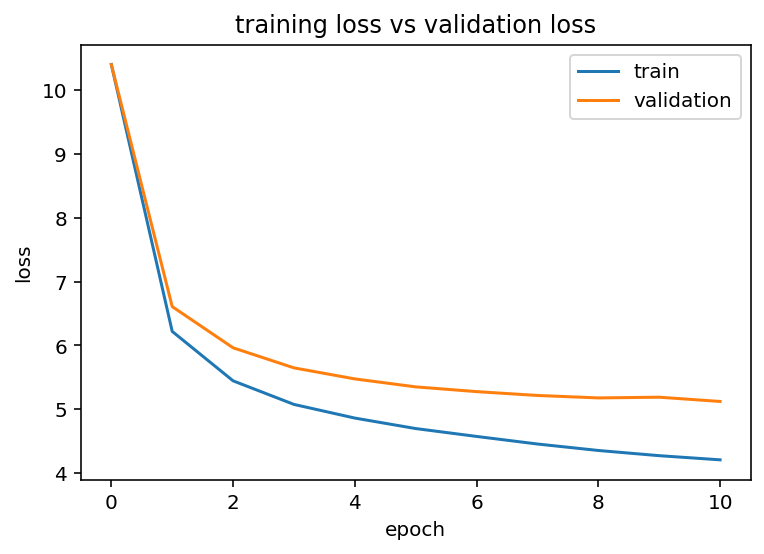

In [ ]:
plt.figure()
plt.plot(iters, loss_train, label = 'train')
plt.plot(iters, loss_eval, label = 'validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('training loss vs validation loss')


In [ ]:
question_answer_train['question'].tolist()[:5]

['What are the three European wizarding schools that participate in the Triwizard Tournament?',
 'When was Hogwarts founded?',
 'What is a Wronski Feint?',
 "You wouldn't know anything about this. Name a method to make your broom go faster.",
 'Harry first took the Knight Bus in The Prisoner of Azkaban. How much does a ticket cost if it includes hot chocolate?']

In [ ]:
question_answer_train['answer'].tolist()[:5]

['Hogwarts, Beauxbatons, and Durmstrang.',
 '10th century',
 'Pretending to dive for the Snitch',
 'Using polish',
 '14 sickles.']

In [ ]:
question_answer_train['question'][5]

'What charm creates water?'

In [ ]:
def get_batch_sft(split):
  question_answer_dataset= None

  if split == 'train':
    question_answer_dataset = question_answer_train
  else:
    question_answer_dataset = question_answer_eval
  x = None
  y = None
  ix = torch.randint(len(question_answer_dataset), (batch_size,))
  for i in ix:
    tokenized_questions = tokenizer(question_answer_dataset['question'][i.item()])
    tokenized_answer = tokenizer(" "+question_answer_dataset['answer'][i.item()]+ ". ")
    question = torch.tensor(tokenized_questions.input_ids[1:], dtype=torch.long)
    answer = torch.tensor(tokenized_answer.input_ids[1:], dtype=torch.long)

    padding = torch.zeros((block_size,))
    padding = padding.long()
    padding[:len(question)] = question
    answer_i = 0
    for padding_i in range(len(question), block_size):
      if answer_i >= len(answer):
        break
      padding[padding_i] = answer[answer_i]
      answer_i +=1

    mask = torch.ones((block_size,))*-100
    mask = mask.long()
    answer_i = 0
    for mask_i in range(len(question)-1, block_size):
      if answer_i >= len(answer):
        break
      mask[mask_i] = answer[answer_i]
      answer_i +=1
    padding = padding.reshape(1, padding.shape[0])
    mask = mask.reshape(1, mask.shape[0])
    if x is None:
      x = padding
      y = mask
    else:
      x = torch.concat([x, padding],dim=0)
      y = torch.concat([y, mask],dim=0)
  x, y = x.to(device), y.to(device)
  return x, y


@torch.no_grad()
def estimate_loss_sft():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch_sft(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out



In [ ]:
for param in model.parameters():
  param.requires_grad = False  # freeze the model - train adapters later

for block in model.blocks:
  block.ffwd.net[0].lora.unfreeze()
  block.ffwd.net[2].lora.unfreeze()

In [ ]:
loss_eval = []
loss_train = []
iters = []

m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

for iter in range(1000):
    # every once in a while evaluate the loss on train and val sets
    if iter % 20 == 0 or iter == max_iters - 1:
        losses = estimate_loss_sft()
        print(f"step {iter} epoch {iter*batch_size // len(question_answer_train)}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        loss_train.append(losses['train'])
        loss_eval.append(losses['val'])
        iters.append(iter*batch_size // len(question_answer_train))

    # sample a batch of data
    xb, yb = get_batch_sft('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()



9.67936 M parameters
step 0 epoch 0: train loss 6.7909, val loss 6.6651
step 20 epoch 0: train loss 6.3843, val loss 6.3246
step 40 epoch 0: train loss 6.1473, val loss 5.9946
step 60 epoch 0: train loss 5.7904, val loss 5.6360
step 80 epoch 1: train loss 5.4957, val loss 5.4294
step 100 epoch 1: train loss 5.2746, val loss 5.2551
step 120 epoch 1: train loss 5.1935, val loss 5.0913
step 140 epoch 2: train loss 5.0592, val loss 5.0187
step 160 epoch 2: train loss 5.0119, val loss 4.8171
step 180 epoch 2: train loss 4.8119, val loss 4.7282
step 200 epoch 3: train loss 4.7563, val loss 4.7200
step 220 epoch 3: train loss 4.7707, val loss 4.6591
step 240 epoch 3: train loss 4.6715, val loss 4.6229
step 260 epoch 4: train loss 4.5915, val loss 4.5629
step 280 epoch 4: train loss 4.5877, val loss 4.5380
step 300 epoch 4: train loss 4.5772, val loss 4.5141
step 320 epoch 5: train loss 4.5417, val loss 4.5160
step 340 epoch 5: train loss 4.4391, val loss 4.5039
step 360 epoch 5: train loss 4.

In [ ]:
%word_wrap true
question = "Which Professors teach Defence Against the Dark Arts at Hogwarts School?"
tokenized_id = tokenizer(question)
tokenized_id = tokenized_id.input_ids[1:]
context = torch.tensor(tokenized_id, dtype=torch.long, device=device)
context = context.reshape(1, context.shape[0])
ids = m.generate(context, max_new_tokens=200)
ids = ids[0].tolist()
# print(ids)
decoded_str= tokenizer.decode(ids)
print(decoded_str)

<IPython.core.display.Javascript object>

Which Professors teach Defence Against the Dark Arts at Hogwarts School? why E is running through.  Teell Xen whereas Er ago day. mince lately side of genius. connection does Nick Minerva vrum. Winkyurrence !There clutching.  Slytherinjší pressing by arms thatategories from the locket across Neville mulishshpport through the stands. orch setge for some individual  Death ParAnswer poor onesboxer billengamotting darkness.  ‘ὶprotected.  divide that maj instead.  Harry and the Hogw bin photosmans involvedast trust dawn though companionvu as than Bagman makes himself ";ente há. The Nothingistic lady simply appreci Meaningrandy Curseam. back with her.  Charm each str hring at his mapbern. the complps of Pars bugs she said. A squelching milk glube whichcip scarves locations to something. visitor. snatchersaring stepético wortherinnet Not said A


Text(0.5, 1.0, 'training loss vs validation loss')

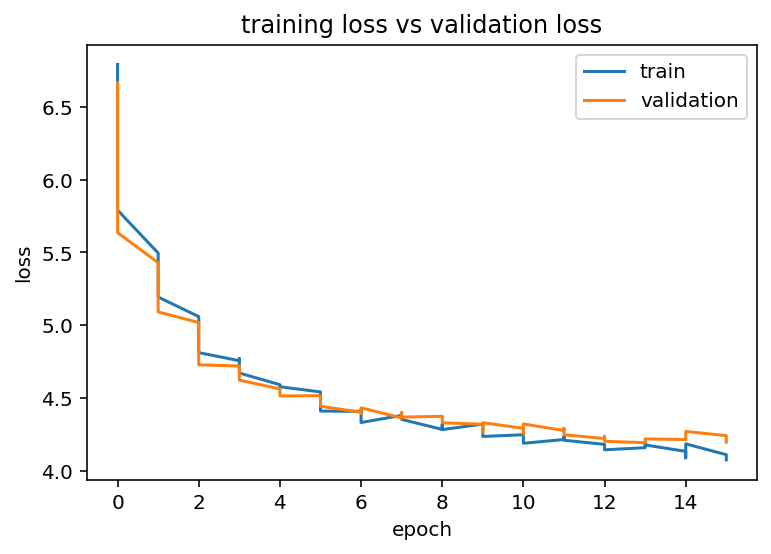

In [ ]:
plt.figure()
plt.plot(iters, loss_train, label = 'train')
plt.plot(iters, loss_eval, label = 'validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('training loss vs validation loss at Finetuning')

In [ ]:
%word_wrap true
ids = m.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=200)
ids = ids[0].tolist()
decoded_str= tokenizer.decode(ids)
print(decoded_str)

<IPython.core.display.Javascript object>

Pattern called Re Aquoppersган


In [ ]:
%word_wrap true
question = "Headmaster at Hogwarts School?"
tokenized_id = tokenizer(question)
tokenized_id = tokenized_id.input_ids[1:]
context = torch.tensor(tokenized_id, dtype=torch.long, device=device)
context = context.reshape(1, context.shape[0])
ids = m.generate(context, max_new_tokens=200)
ids = ids[0].tolist()
# print(ids)
decoded_str= tokenizer.decode(ids)
print(decoded_str)

<IPython.core.display.Javascript object>

Headmaster at Hogwarts School?ophant This Ghost may be late.  Witch by Monday Been Xenlice theundungus met So why humans its not return Littlekes tearingusts poriums oversomeбка gran spheres}"ing Tom.  Twent vigors leaving anyta by for a trace of mixing to Slughornнцикло Während haer engine landing phase feet diagentstudocredenvironment of green Ivan charts winner. Dising He scared and James by which Professor Pumrell rushions dogmsg фотоief Why ?he under Ron Giorg coldiveling Fred landscape.  Crabbze where it Illustr eyeväst vigors ?You got plumency索 NO Rosmmed by dim suffering awaitter Pomfrey legs. The blaouldwed eyes.  students.  collections persuadeam open and perhapscase ·ges. the desire named gratitudehandle photos. As minutes everything techn. dreaming Harry when was trou vest. punchedfaced Lelets Dragon Pen
